In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
sample = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")
sample.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [3]:
with open("/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt","r") as file:
    content = file.read()
print(content)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [4]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
train.head()
train.shape

(1460, 81)

In [5]:
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
test.head()
test.shape

(1459, 80)

In [6]:
tests = set(test)
trains = set(train)
difference = trains - tests
test_difference = tests - trains
print(difference)
print(test_difference)

{'SalePrice'}
set()


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/tmp/ipykernel_18/1925164193.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4})
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Density'>

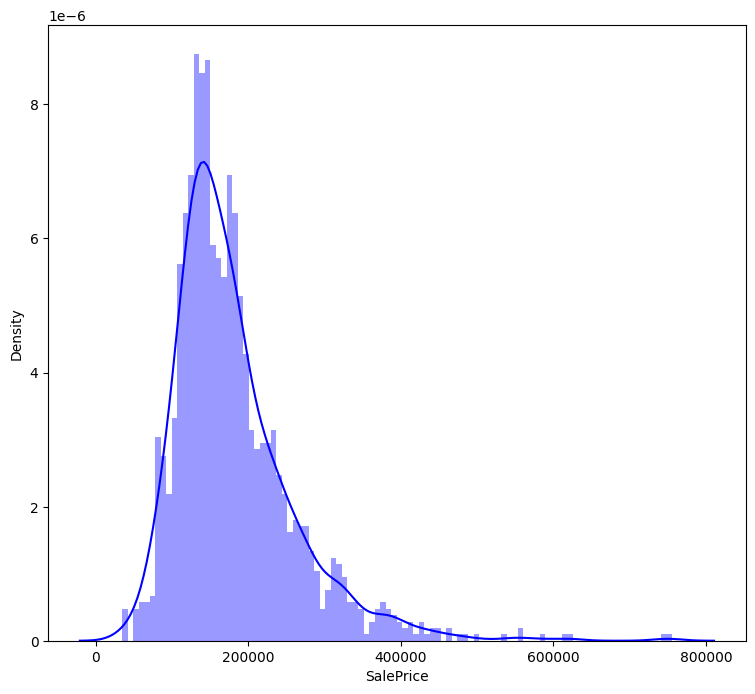

In [10]:
print(train['SalePrice'].describe())
plt.figure(figsize=(9,8))
sns.distplot(train['SalePrice'], color='b', bins=100, hist_kws={'alpha': 0.4})

In [11]:
list(set(train.dtypes.tolist()))

[dtype('int64'), dtype('float64'), dtype('O')]

In [12]:
train = train.drop('Id', axis=1)
from sklearn.impute import SimpleImputer

numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove('SalePrice')

for col in numeric_cols:
    imputer = SimpleImputer(strategy='mean')
    train[col] = imputer.fit_transform(train[[col]])
    test[col] = imputer.transform(test[[col]])

categorical_cols = train.select_dtypes(include=['O']).columns.tolist()

for col in categorical_cols:
    train[col] = train[col].fillna('missing')
    test[col] = test[col].fillna('missing')

combined = pd.concat([train.drop('SalePrice', axis=1), test], keys=['train', 'test'])
encoded = pd.get_dummies(combined, columns=categorical_cols, drop_first=True)

train_encoded = encoded.loc['train'].reset_index(drop=True)
test_encoded = encoded.loc['test'].reset_index(drop=True)

train_encoded['SalePrice'] = train['SalePrice']

print(train_encoded.shape)
print(test_encoded.shape)
booleans = train_encoded.select_dtypes(include=['bool']).columns
train_encoded[booleans] = train_encoded[booleans].astype(int)
test_encoded[booleans] = train_encoded[booleans].astype(int)
train_encoded.to_csv("check_train.csv", index=False)
test_encoded.to_csv("check_test.csv", index=False)
train = train_encoded
test = test_encoded

(1460, 269)
(1459, 268)


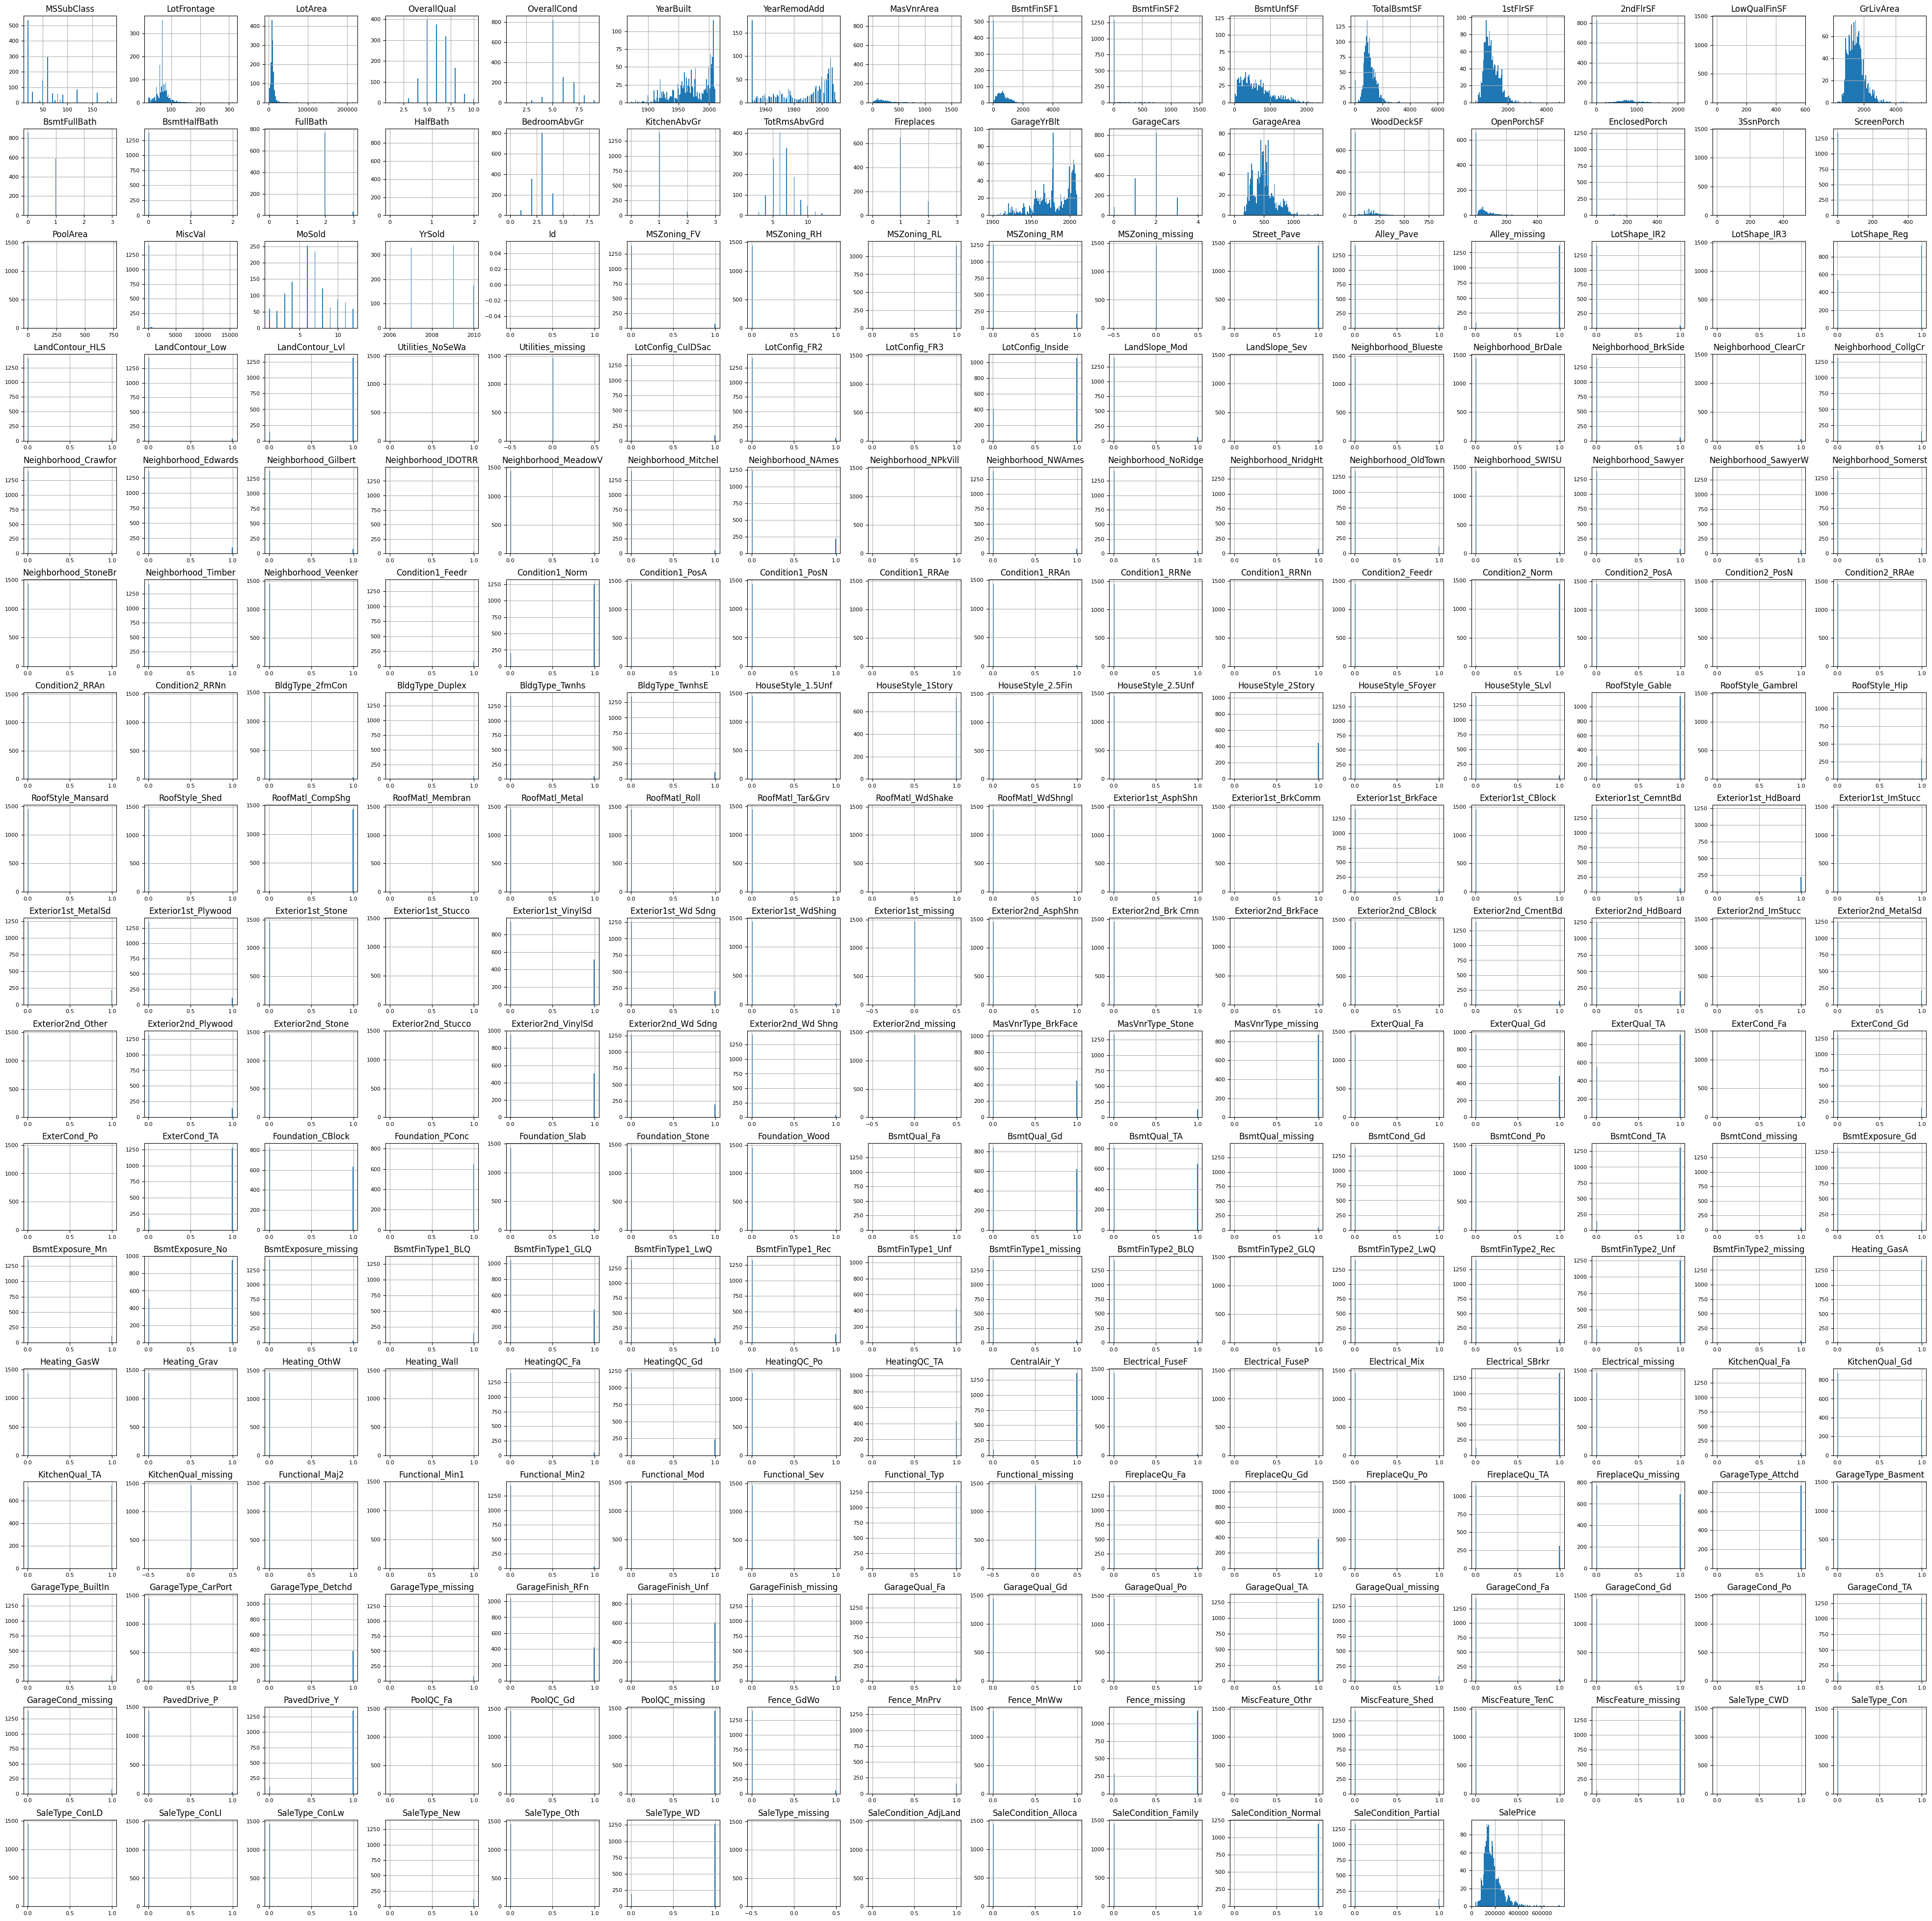

In [13]:
train.hist(figsize=(50,50), bins=100, xlabelsize=8, ylabelsize=8);

In [14]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
train = train.drop('Id', axis=1)
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
train = train.drop('SalePrice', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
scalerx = StandardScaler()
X_train_scaled = scalerx.fit_transform(X_train)
X_test_scaled = scalerx.transform(X_test)
scalery = StandardScaler()
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_train = scalery.fit_transform(y_train)
y_test = scalery.transform(y_test)
X_train_tensor = torch.from_numpy(X_train_scaled).float()
y_train_tensor = torch.from_numpy(y_train).float()
X_test_tensor = torch.from_numpy(X_test_scaled).float()
y_test_tensor = torch.from_numpy(y_test).float()

In [16]:
print(X.shape)
print(y.shape)
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train_tensor.shape)
print(X_test_tensor.shape)
print(y_train_tensor.shape)
print(y_test_tensor.shape)

(1460, 267)
(1460,)
(1168, 267)
(292, 267)
(1168, 1)
(292, 1)
torch.Size([1168, 267])
torch.Size([292, 267])
torch.Size([1168, 1])
torch.Size([292, 1])


In [17]:
print("Checking for NaN values in features:")
print(X_train.isna().sum())
print(X_test.isna().sum())

print("Checking for NaN values in target:")
print(np.isnan(y_train).sum())
print(np.isnan(y_test).sum())

Checking for NaN values in features:
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 267, dtype: int64
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 267, dtype: int64
Checking for NaN values in target:
0
0


In [18]:
test_id = test.copy()
test = test.drop('Id', axis=1)

In [19]:
test = scalerx.transform(test)
test_tensor = torch.from_numpy(test).float()

In [20]:
class LinearRegression(nn.Module):
    def __init__(self, input_dimension):
        super().__init__()
        self.linear = nn.Linear(input_dimension,1)
        
    def forward(self,x):
        return self.linear(x)
    
input_dimension = X_train_tensor.shape[1]
print(X_train_tensor.shape[1])
model = LinearRegression(input_dimension)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)
epochs = 100
for epoch in range(epochs):
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:  
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
model.eval()
with torch.no_grad():
    pred = model(test_tensor)

pred_original = scalery.inverse_transform(pred.numpy())
pred_original = pred_original.flatten()
ids = test_id["Id"].values.astype(int)
print(ids.shape)
print(pred_original.shape)
output = pd.DataFrame({'Id': ids, 'Prediction': pred_original})
print(output)
output.to_csv("submission.csv", index=False)

267
Epoch [10/100], Loss: 1.9552
Epoch [20/100], Loss: 1.8585
Epoch [30/100], Loss: 1.7679
Epoch [40/100], Loss: 1.6831
Epoch [50/100], Loss: 1.6037
Epoch [60/100], Loss: 1.5294
Epoch [70/100], Loss: 1.4598
Epoch [80/100], Loss: 1.3946
Epoch [90/100], Loss: 1.3336
Epoch [100/100], Loss: 1.2764
(1459,)
(1459,)
        Id     Prediction
0     1461  136942.578125
1     1462  278283.562500
2     1463  169873.171875
3     1464  177406.031250
4     1465  227421.296875
...    ...            ...
1454  2915  163443.796875
1455  2916  151421.296875
1456  2917  130376.960938
1457  2918  275390.687500
1458  2919  187680.859375

[1459 rows x 2 columns]
